In [3]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import  word_tokenize,regexp_tokenize 
from nltk.corpus import stopwords
import string
import nltk
import sklearn

In [5]:
all_files=os.listdir("C:\\Users\\Admin\\Untitled Folder 26\\Untitled Folder\\nbProject\\20_newsgroups")
y=all_files  #saving all labels

y

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [35]:
d={}

for folders in os.listdir('C:\\Users\\Admin\\Untitled Folder 26\\Untitled Folder\\nbProject\\20_newsgroups'):
    d[folders]=[]
    
    subpath=os.path.join('C:\\Users\\Admin\\Untitled Folder 26\\Untitled Folder\\nbProject\\20_newsgroups',str(folders))
    for files in os.listdir(subpath):
        file=open(os.path.join(subpath,files),'r')
        d[folders].append(file.read())
        

        

In [15]:
len(d[y[1]])

1000

In [36]:
words=stopwords.words('english')
words.extend(['subject:','from:', 'date:', 'newsgroups:', 'message-id:', 'lines:', 'path:', 'organization:', 
            'would', 'writes:', 'references:', 'article', 'sender:', 'nntp-posting-host:', 'people', 
            'university', 'think', 'xref:', 'cantaloupe.srv.cs.cmu.edu', 'could', 'distribution:', 'first', 
            'anyone','world', 'really', 'since', 'right', 'believe', 'still', 
            "max>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'"])


v={} #vocab dictionary

for folders in y:
    for data in d[folders]:
        split_data=data.split()
        for w in split_data:
            if w.lower() not in words and len(w.lower())>=5:
                if w.lower() not in v:
                    v[w.lower()]=1
                else:
                    v[w.lower()]+=1
len(v)

390170

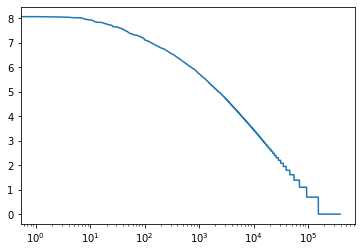

In [49]:
frequency=[]
for i in sorted(v.items(),key=lambda x:x[1],reverse=True):
    frequency.append(np.log(i[1]))
    
plt.plot(frequency)
plt.xscale('log')

In [62]:
verb_vector=sorted(v.items(),key=lambda x:x[1],reverse=True)[0:1000] #im using 1000 words as verb vector 
verb_vector_list=[i[0] for i in verb_vector]

In [69]:
def create_data(verb_vector_list):
    X=[]
    Y=[]
    for folders in os.listdir('C:\\Users\\Admin\\Untitled Folder 26\\Untitled Folder\\nbProject\\20_newsgroups'):
        subpath=os.path.join('C:\\Users\\Admin\\Untitled Folder 26\\Untitled Folder\\nbProject\\20_newsgroups',str(folders))
        for files in os.listdir(subpath):
            file=open(os.path.join(subpath,files),'r')
            x=[0 for i in range(len(verb_vector_list))]
            y=folders
            words=file.read().split()
            for i in range(0,len(verb_vector_list)):
                if verb_vector_list[i] in words:
                    x[i]+=1
            X.append(x)
            Y.append(y)
    return np.array(X),np.array(Y)
            
        

In [70]:
X_train,y_train=create_data(verb_vector_list)

In [87]:
X_train.shape,y_train.shape
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X_train,y_train)

In [88]:
from sklearn.naive_bayes import MultinomialNB

In [89]:
clf=MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

## accuracy of sklearn model

In [93]:
clf.score(X_test,y_test)

0.8332

## Our Model

In [132]:
def fit(X_train,y_train):
    nb_dict={}
    nb_dict['total_dict']=len(y_train)
    for c in np.unique(y_train):
        nb_dict[c]={}
        filter_=y_train==c
        x=X_train[filter_] #each and every file with a single class
        y=y_train[filter_]
        total_words=0
        nb_dict[c]['class_count']=len(y)
        for f in range(0,len(X_train[0])):
            nb_dict[c][f]=x[:,f].sum()
            total_words+=x[:,f].sum()
            
        nb_dict[c]['total_words_in_file']=total_words          
    return nb_dict

In [133]:
d=fit(X_train,y_train)

In [ ]:
def predict_one_file(X_test,nb_dict):
    best_class=None
    best_proba=-99999
    
    for c in list(nb_dict.keys()):
        if c=='total_dict':
            continue
        output=np.log(nb_dict[c]['class_count'])-np.log(nb_dict['total_dict'])
        
        feature_length=len(X_test)
        
        for f in range(0,feature_length):
            if f==1 or f==-1:
                continue
            count_word_in_file=nb_dict[c][f]
            prob=np.log(count_word_in_file+1)-np.log((nb_dict[c][f]+feature_length))
            
            if X_test[f]>0:
                output=output+prob
            
        if output>best_proba:
            best_proba=output
            best_class=c
            
            
    return best_class,best_proba
            
        
        
    

In [204]:
predictions=[]
for i in range(0,len(X_test)):
    prediction=predict_one_file(X_test[i],d)[0]
    predictions.append(prediction)

In [205]:
np.mean(y_test==np.array(predictions))

0.6794